In [1]:
import numpy as np
from scipy.optimize import minimize

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import tresonator as T

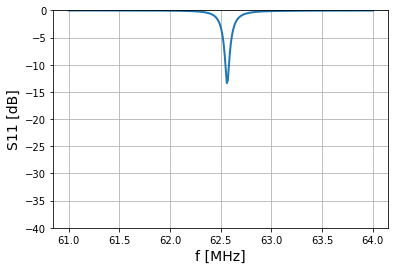

In [2]:
fs = 1e6*np.linspace(61, 64, 301)
P_in = 20e3 # W

@interact(Lsc_DUT=(20e-3, 60e-3, 1e-3), Lsc_CEA=(1e-3, 200e-3, 1e-3), add_loss=(0.1, 5, 0.1))
def S11_vf_f(Lsc_DUT=40e-3, Lsc_CEA=20e-3, add_loss=1.0):
    S11dB = []
    for f in fs:
        _cfg = T.Configuration(f, P_in, Lsc_DUT, Lsc_CEA, additional_losses=add_loss)
        S11dB.append(_cfg.S11dB())
    fig,ax=plt.subplots()
    ax.plot(fs/1e6, S11dB, lw=2)
    ax.grid(True)
    ax.set_ylim(-40,0)
    ax.set_xlabel('f [MHz]', fontsize=14)
    ax.set_ylabel('S11 [dB]', fontsize=14)

In [3]:
def S11_from_Ls(f, L_DUT, L_CEA, add_loss=1.0, P_in=1):
    _cfg = T.Configuration(f, P_in, L_DUT, L_CEA, additional_losses=add_loss)
    return _cfg.S11dB()

S11dB_vec = np.vectorize(S11_from_Ls)

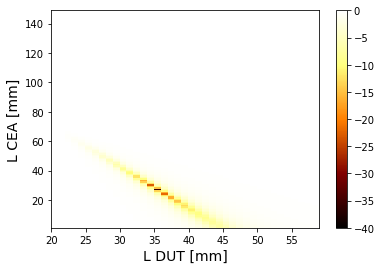

In [4]:
L_DUTs = 1e-3*np.arange(20, 60, 1)
L_CEAs = 1e-3*np.arange(1, 150, 1)
LL_DUTs, LL_CEAs = np.meshgrid(L_DUTs, L_CEAs)

@interact(f=(60, 65, 0.1))
def plot_2D(f=62):
    S11dB = S11dB_vec(f*1e6, LL_DUTs, LL_CEAs, add_loss=1.0)
    fig,ax=plt.subplots()
    c=ax.pcolor(LL_DUTs*1e3, LL_CEAs*1e3, S11dB, vmin=-40, vmax=0, cmap='afmhot')
    plt.colorbar(c)
    ax.set_xlabel('L DUT [mm]', fontsize=14)
    ax.set_ylabel('L CEA [mm]', fontsize=14)